# HR Analytics Project- Understanding the Attrition in HR

### Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [2]:
!pip install lightgbm

In [3]:
# Importing all the necessary libraries here.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

In [7]:
df = pd.read_csv("HR attri.txt")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


We can see that our data set is having 1470 rows and 35 columns.

In [10]:
# checking the top 5 rows using the function head
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [11]:
# checking the bottom 5 rows using the function tail
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


# EDA (Exploratory data analysis)

In [8]:
df.shape

(1470, 35)

In [12]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

As per above function, we have checked the 35 names of the columns of our dataset.

In [13]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [14]:
# Lets check all the datatypes of our dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- As per above information we can see that our dataset has 26 integer values and 9 object values

- We will need to treat the object datatype columns so that our machine learning model can understand the data 

In [16]:
# Lets check the number of unique values in our dataset columns:
df.nunique().to_frame("Unique Values")

,Unique Values
Age,43
Attrition,2
BusinessTravel,3
DailyRate,886
Department,3
DistanceFromHome,29
Education,5
EducationField,6
EmployeeCount,1
EmployeeNumber,1470


In [17]:
#Lets check the unique values in the column 'Age':
df['Age'].unique()

array([41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53,
       24, 21, 42, 44, 46, 39, 43, 50, 26, 48, 55, 45, 56, 23, 51, 40, 54,
       58, 20, 25, 19, 57, 52, 47, 18, 60], dtype=int64)

In [18]:
# Lets check the unique values in the column 'Attrition':
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [19]:
# Lets check the unique values in the column 'BusinessTravel'
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [20]:
# Lets check the unique values in the column 'DailyRate':
df['DailyRate'].unique()

array([1102,  279, 1373, 1392,  591, 1005, 1324, 1358,  216, 1299,  809,
        153,  670, 1346,  103, 1389,  334, 1123, 1219,  371,  673, 1218,
        419,  391,  699, 1282, 1125,  691,  477,  705,  924, 1459,  125,
        895,  813, 1273,  869,  890,  852, 1141,  464, 1240, 1357,  994,
        721, 1360, 1065,  408, 1211, 1229,  626, 1434, 1488, 1097, 1443,
        515,  853, 1142,  655, 1115,  427,  653,  989, 1435, 1223,  836,
       1195, 1339,  664,  318, 1225, 1328, 1082,  548,  132,  746,  776,
        193,  397,  945, 1214,  111,  573, 1153, 1400,  541,  432,  288,
        669,  530,  632, 1334,  638, 1093, 1217, 1353,  120,  682,  489,
        807,  827,  871,  665, 1040, 1420,  240, 1280,  534, 1456,  658,
        142, 1127, 1031, 1189, 1354, 1467,  922,  394, 1312,  750,  441,
        684,  249,  841,  147,  528,  594,  470,  957,  542,  802, 1355,
       1150, 1329,  959, 1033, 1316,  364,  438,  689,  201, 1427,  857,
        933, 1181, 1395,  662, 1436,  194,  967, 14

In [22]:
# Lets check the unique values in the column 'Department':
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [23]:
# Lets check the unique values in the column 'DistanceFromHome':
df['DistanceFromHome'].unique()

array([ 1,  8,  2,  3, 24, 23, 27, 16, 15, 26, 19, 21,  5, 11,  9,  7,  6,
       10,  4, 25, 12, 18, 29, 22, 14, 20, 28, 17, 13], dtype=int64)

In [24]:
# Lets check the unique values in the column 'Education':
df['Education'].unique()

array([2, 1, 4, 3, 5], dtype=int64)

In [25]:
# Lets check the unique values in the column 'EducationField':
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [26]:
# Lets check the unique values in the column 'EmployeeCount':
df['EmployeeCount'].unique()

array([1], dtype=int64)

In [27]:
# Lets check the unique values in the column 'EmployeeNumber':
df['EmployeeNumber'].unique()

array([   1,    2,    4, ..., 2064, 2065, 2068], dtype=int64)

In [28]:
# Lets check the unique values in the column 'EnvironmentSatisfaction'
df['EnvironmentSatisfaction'].unique()

array([2, 3, 4, 1], dtype=int64)

In [29]:
# Lets check the uniue values in the column 'Gender':
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [30]:
# Lets check the unqiue values in the column 'HourlyRate':
df['HourlyRate'].unique()

array([ 94,  61,  92,  56,  40,  79,  81,  67,  44,  84,  49,  31,  93,
        50,  51,  80,  96,  78,  45,  82,  53,  83,  58,  72,  48,  42,
        41,  86,  97,  75,  33,  37,  73,  98,  36,  47,  71,  30,  43,
        99,  59,  95,  57,  76,  87,  66,  55,  32,  52,  70,  62,  64,
        63,  60, 100,  46,  39,  77,  35,  91,  54,  34,  90,  65,  88,
        85,  89,  68,  69,  74,  38], dtype=int64)

In [31]:
# Lets check the unique values in the column 'JobInvolvement':
df['JobInvolvement'].unique()

array([3, 2, 4, 1], dtype=int64)

In [32]:
# Lets check the unique values in the column 'JobLevel':
df['JobLevel'].unique()

array([2, 1, 3, 4, 5], dtype=int64)

In [33]:
# Lets check the unique values in the column 'JobRole':
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [34]:
# Lets check the unique values in the column 'JobSatisfaction':
df['JobSatisfaction'].unique()

array([4, 2, 3, 1], dtype=int64)

In [35]:
# Lets check the unique values in the column 'MaritalStatus':
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [36]:
# Lets check the unique values in the column 'MonthlyIncome':
df['MonthlyIncome'].unique()

array([5993, 5130, 2090, ..., 9991, 5390, 4404], dtype=int64)

In [37]:
# Lets check the unique values in the column 'MonthlyRate':
df['MonthlyRate'].unique()

array([19479, 24907,  2396, ...,  5174, 13243, 10228], dtype=int64)

In [38]:
# Lets check the unique values in the column 'NumCompaniesWorked':
df['NumCompaniesWorked'].unique()

array([8, 1, 6, 9, 0, 4, 5, 2, 7, 3], dtype=int64)

In [39]:
# Lets check the unique values in the column 'Over18':
df['Over18'].unique()

array(['Y'], dtype=object)

In [40]:
# Lets check the unique values in the column 'OverTime':
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [41]:
# Lets check the unique values in the column 'PercentSalaryHike':
df['PercentSalaryHike'].unique()

array([11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 18, 19, 24, 25],
      dtype=int64)

In [42]:
# Lets check the unique values in the column 'PerformanceRating':
df['PerformanceRating'].unique()

array([3, 4], dtype=int64)

In [43]:
# Lets check the unique values in the column 'RelationshipSatisfaction':
df['RelationshipSatisfaction'].unique()

array([1, 4, 2, 3], dtype=int64)

In [44]:
# Lets check the unique values in the column 'StandardHours':
df['StandardHours'].unique()

array([80], dtype=int64)

In [45]:
# Lets check the unique values in the column 'StockOptionLevel':
df['StockOptionLevel'].unique()

array([0, 1, 3, 2], dtype=int64)

In [46]:
# Lets check the unique values in the column 'TotalWorkingYears':
df['TotalWorkingYears'].unique()

array([ 8, 10,  7,  6, 12,  1, 17,  5,  3, 31, 13,  0, 26, 24, 22,  9, 19,
        2, 23, 14, 15,  4, 29, 28, 21, 25, 20, 11, 16, 37, 38, 30, 40, 18,
       36, 34, 32, 33, 35, 27], dtype=int64)

In [47]:
# Lets check the unique values in the column 'TrainingTimesLastYear':
df['TrainingTimesLastYear'].unique()

array([0, 3, 2, 5, 1, 4, 6], dtype=int64)

In [48]:
# Lets check the unique values in the column 'WorkLifeBalance':
df['WorkLifeBalance'].unique()

array([1, 3, 2, 4], dtype=int64)

In [49]:
# Lets check the unique values in the column 'YearsAtCompany':
df['YearsAtCompany'].unique()

array([ 6, 10,  0,  8,  2,  7,  1,  9,  5,  4, 25,  3, 12, 14, 22, 15, 27,
       21, 17, 11, 13, 37, 16, 20, 40, 24, 33, 19, 36, 18, 29, 31, 32, 34,
       26, 30, 23], dtype=int64)

In [50]:
# Lets check the unique values in the column 'YearsInCurrentRole':
df['YearsInCurrentRole'].unique()

array([ 4,  7,  0,  2,  5,  9,  8,  3,  6, 13,  1, 15, 14, 16, 11, 10, 12,
       18, 17], dtype=int64)

In [51]:
# Lets check the unique values in the column 'YearsSinceLastPromotion':
df['YearsSinceLastPromotion'].unique()

array([ 0,  1,  3,  2,  7,  4,  8,  6,  5, 15,  9, 13, 12, 10, 11, 14],
      dtype=int64)

In [53]:
# Lets check the unique values in the column 'YearsWithCurrManager':
df['YearsWithCurrManager'].unique()

array([ 5,  7,  0,  2,  6,  8,  3, 11, 17,  1,  4, 12,  9, 10, 15, 13, 16,
       14], dtype=int64)

In [21]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [54]:
# Lets check the missing data if any:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- There is no missing data in our dataset, so we dont need to handle it.

In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


- With the help of decribe method in transpose format we can see column details clearly. The count column once again confirms that there are no missing data concern in our dataset. 

- However if we check the min column we do notice columns with zero as their values. However considering the columns that have 0 value in them it is quite possible for freshers in an organisation to have them as 0 marked in their records.

- Here we only get numerical data information therefore all the object datatype columns have been ignored.

In [57]:
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)

- Dropping columns "EmployeeCount", "EmployeeNumber", "Over18", "StandardHours" because data mentioned in this column is of no use, as Employee count just reflects 1, employee number is just a unique number given to all employees, Over18 - only 1 single value is mentioned, Standard hours also have only 1 single value in the rows.

In [58]:
object_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        object_datatype.append(x)
object_datatype

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

- Here we have 8 columns in our dataset with object datatype.

- We need to encode the data into numerical values before preparing classification model.

In [59]:
integer_datatype = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'int64':
        integer_datatype.append(x)
integer_datatype

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

- Here we have 23 columns with integer datatype which has numerical values in it.

# Visualization of Data using Distribution Plot

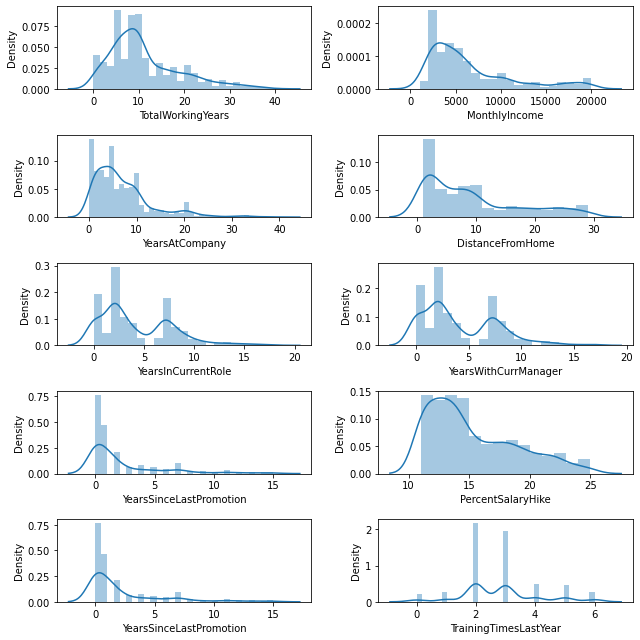

In [60]:
# Univariate Analysis

warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(df['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

# Visualization Of Data Using Countplot

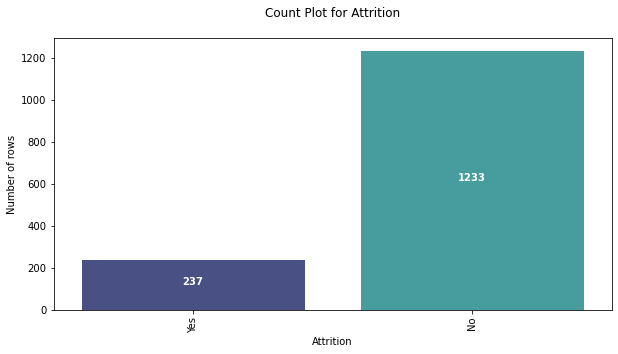

In [61]:
plt.figure(figsize=(10,5))
col_name = 'Attrition'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

- The above countplot we can see that our target label is quite imbalanced and will needed to be treated for the same.

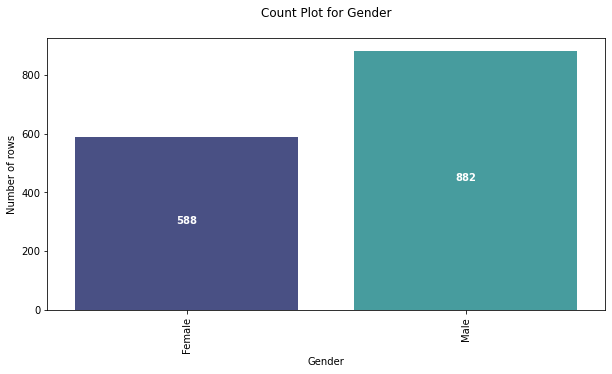

In [62]:
plt.figure(figsize=(10,5))
col_name = 'Gender'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

In the Gender column we can see that the number of male employees is higher than the female employees.

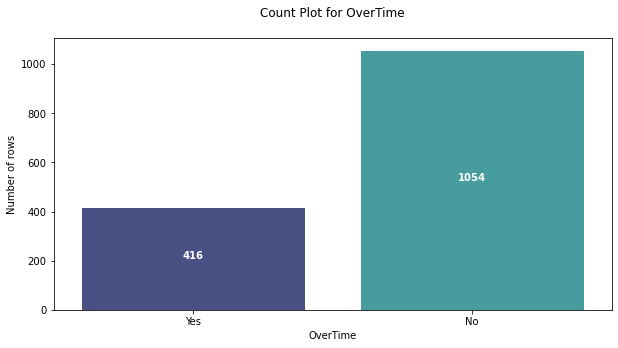

In [63]:
plt.figure(figsize=(10,5))
col_name = 'OverTime'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.show()

The OverTime column shows us the number of employees who do over time and the one's who do not. And it looks like from the above count plot that employees do not prefer doing over time in the company.

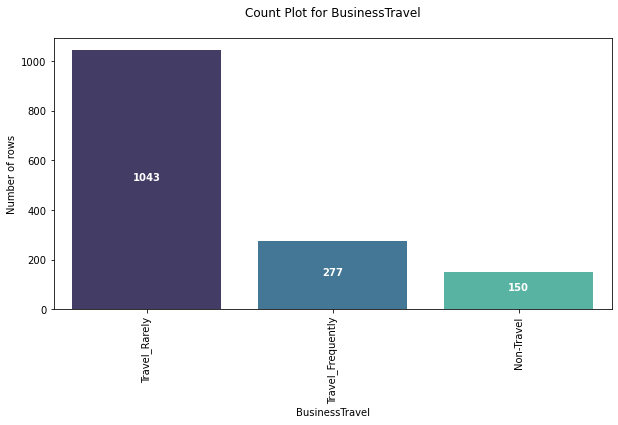

In [64]:
plt.figure(figsize=(10,5))
col_name = 'BusinessTravel'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

In the BusinessTravel column we see a majority of number in the Travel_Rarely value while Non_Travel are the least of them.

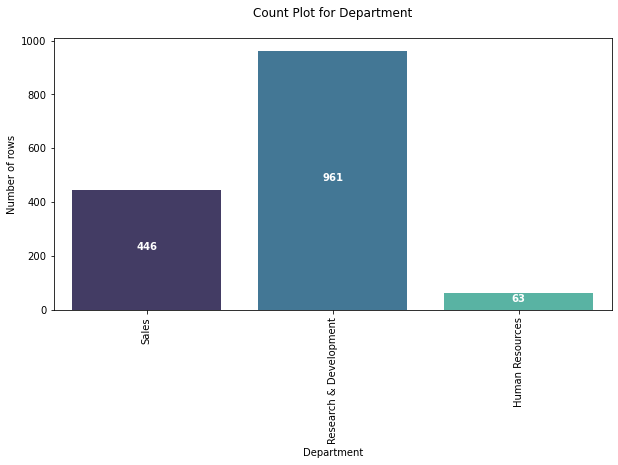

In [65]:
plt.figure(figsize=(10,5))
col_name = 'Department'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

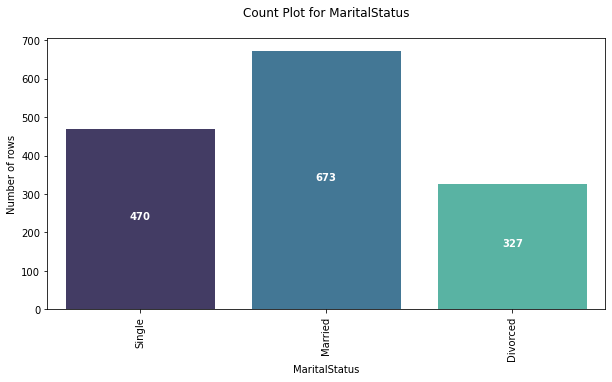

In [66]:
plt.figure(figsize=(10,5))
col_name = 'MaritalStatus'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

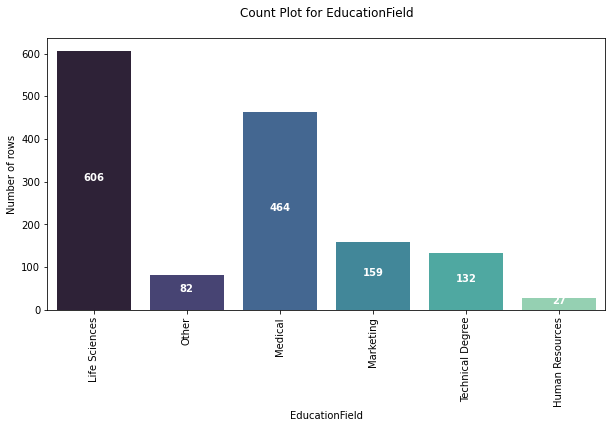

In [67]:
plt.figure(figsize=(10,5))
col_name = 'EducationField'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

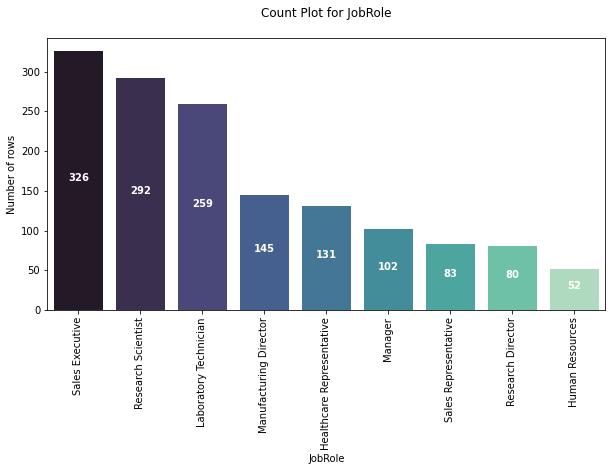

In [68]:
plt.figure(figsize=(10,5))
col_name = 'JobRole'
values = df[col_name].value_counts()
index = 0
ax = sns.countplot(df[col_name], palette="mako")

for i in ax.get_xticklabels():
    ax.text(index, values[i.get_text()]/2, values[i.get_text()], 
            horizontalalignment="center", fontweight='bold', color='w')
    index += 1
    
plt.title(f"Count Plot for {col_name}\n")
plt.ylabel(f"Number of rows")
plt.xticks(rotation=90)
plt.show()

# Visualization of Data using Boxplot

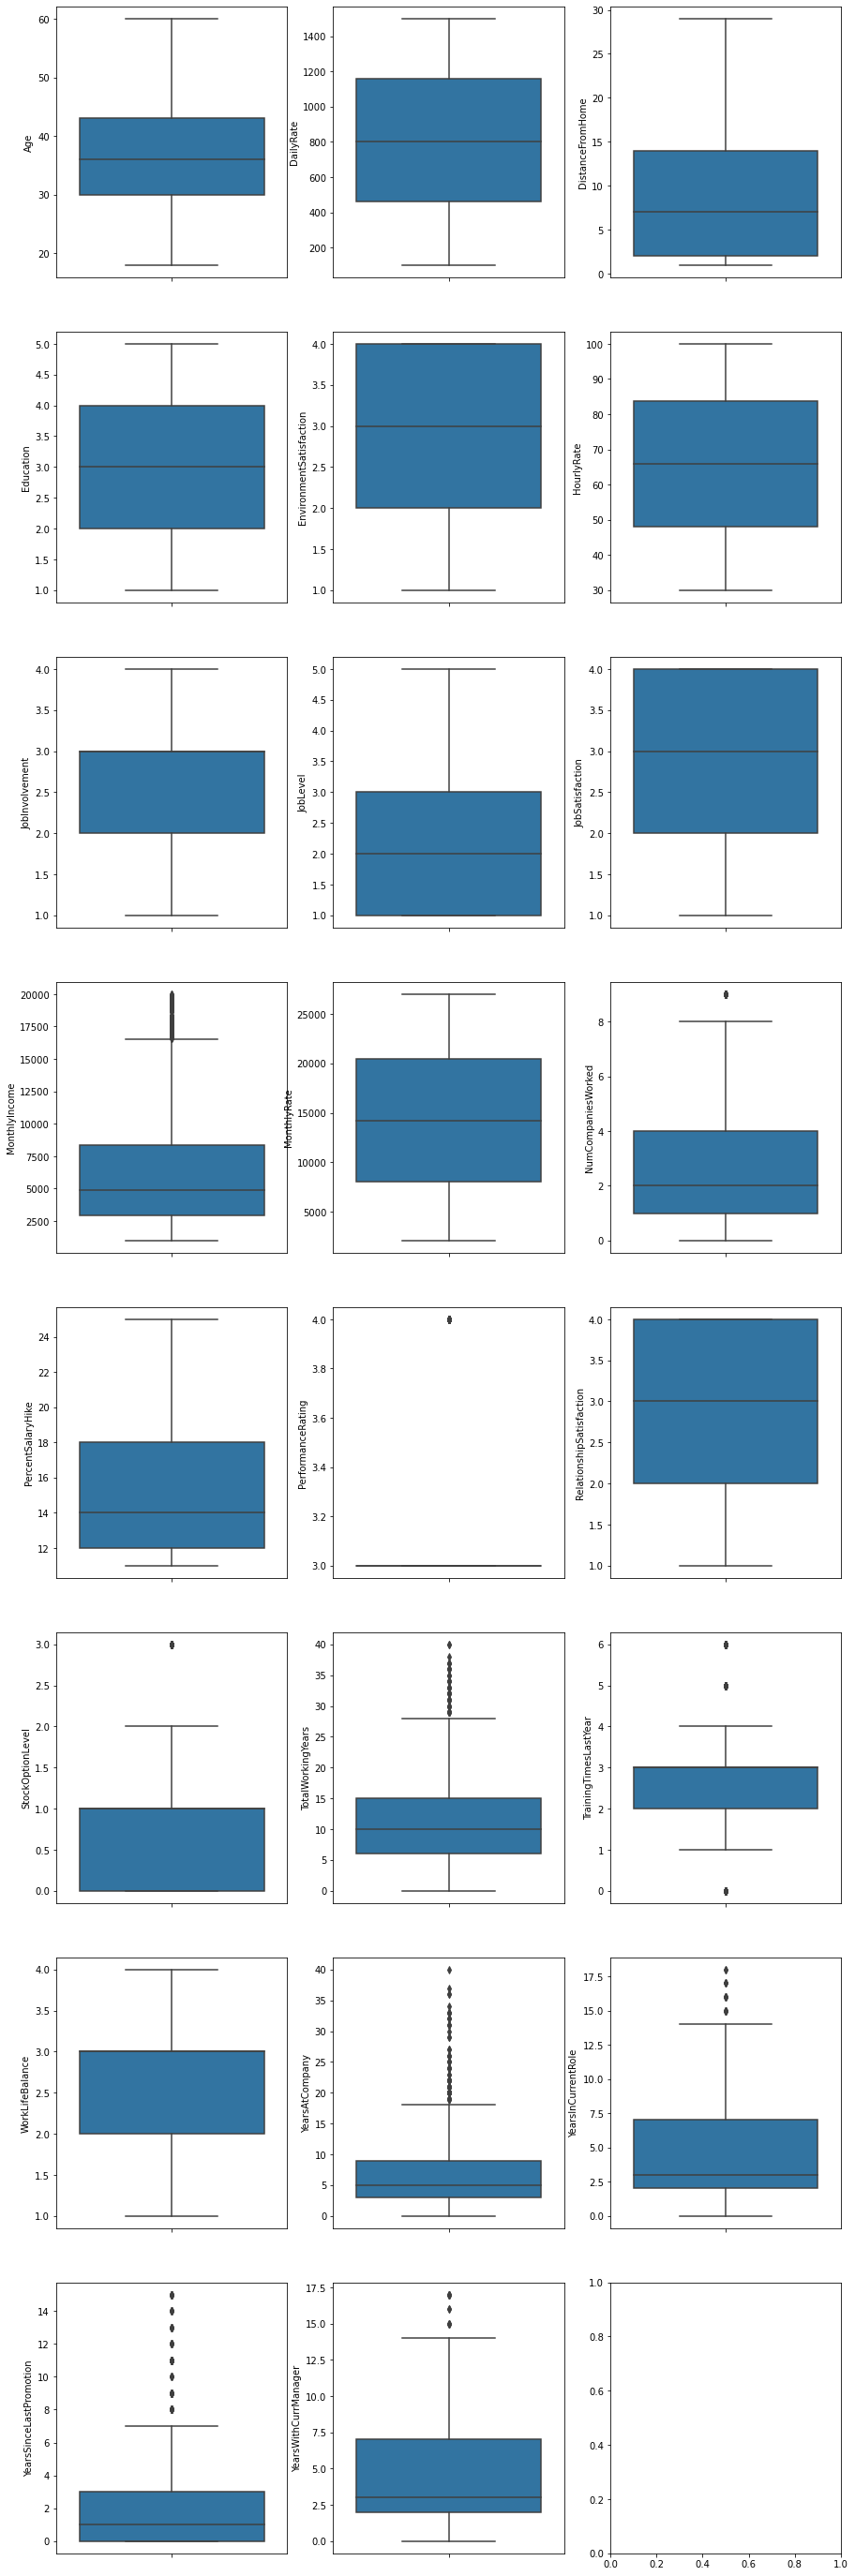

In [69]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.show()

### As per above boxplot, we can see that there is presence of some outliers in below columns:
- Monthly Income
- NumCompaniesWorked
- Performance Rating
- StockOptionLevel
- TotalWorkingYears
- TrainingTimeLastYear
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

# Visualization of data using Distribution plot

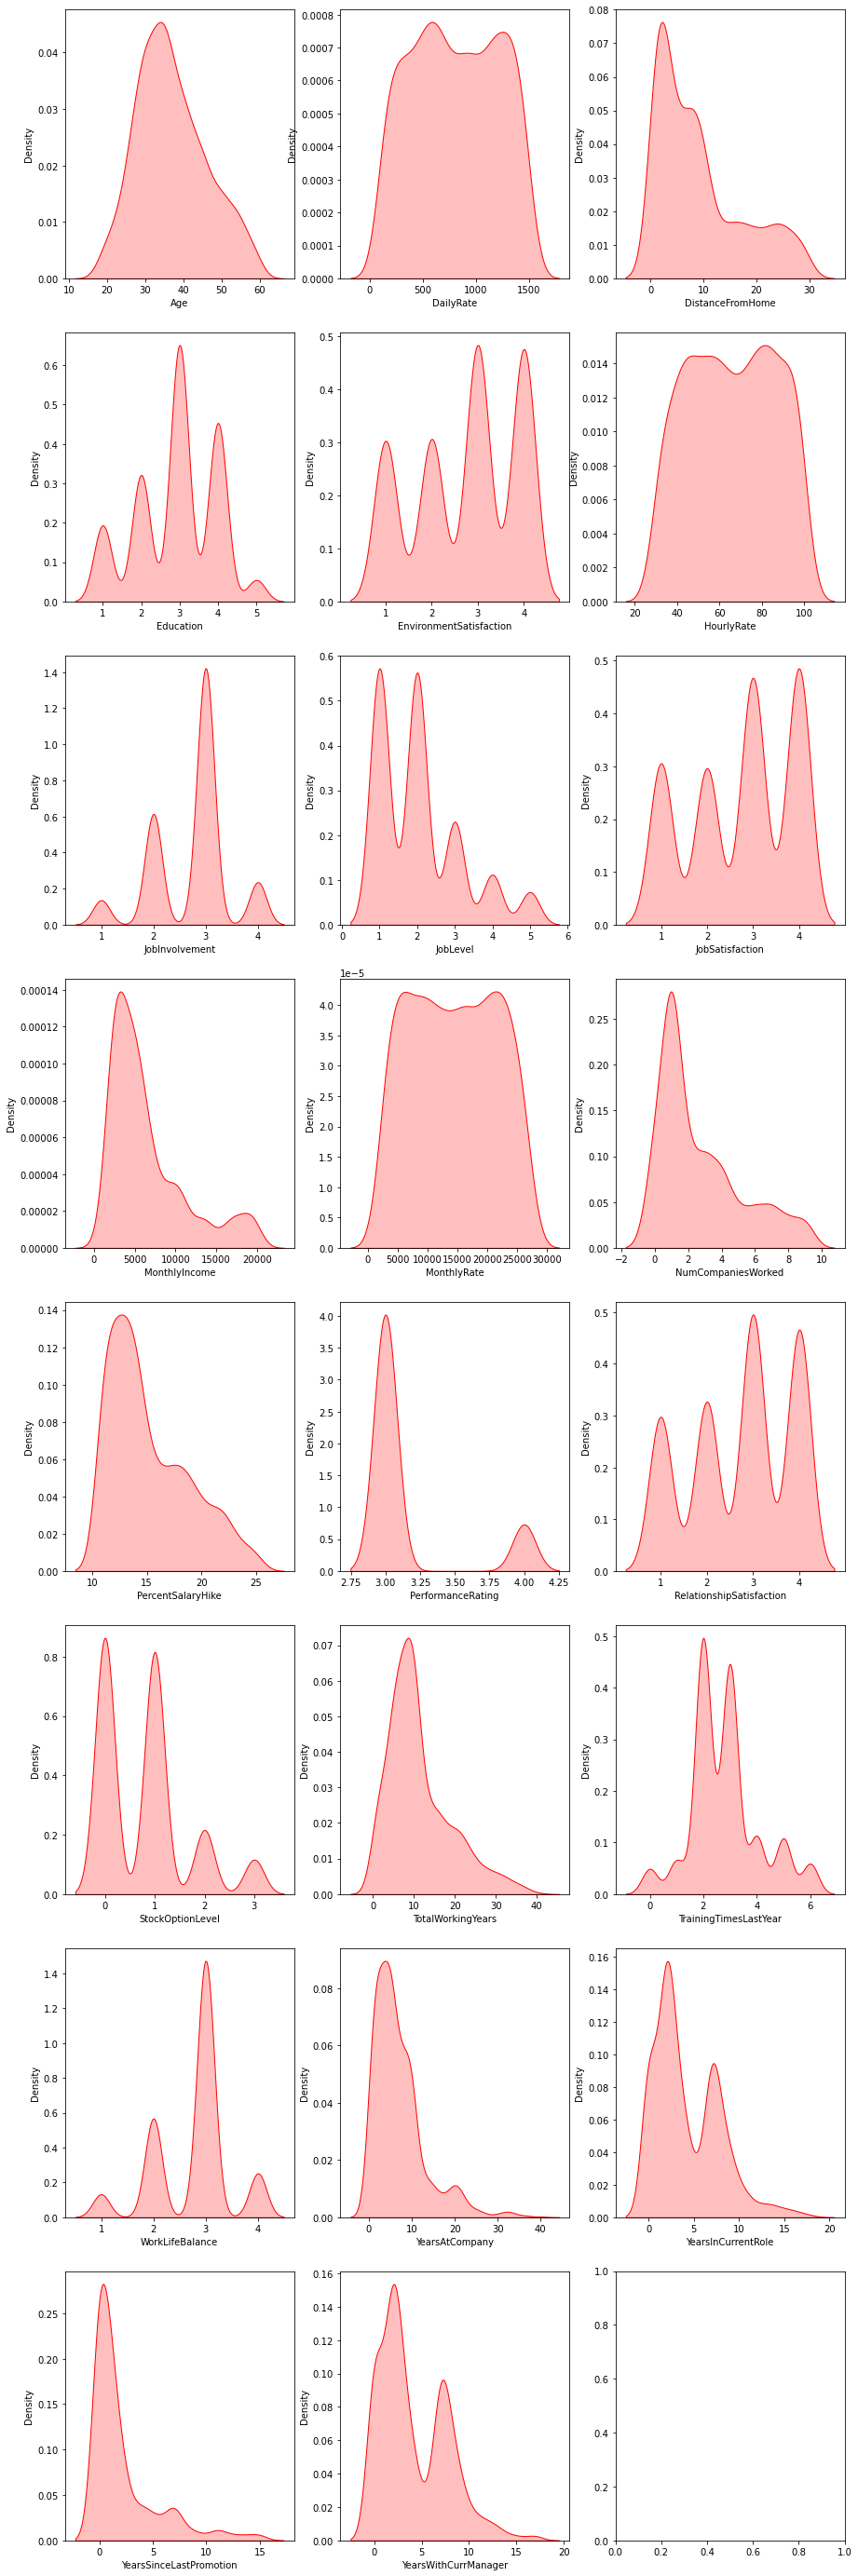

In [70]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.show()

### Some skewness is present in few columns that we will need to handle.

- DistanceFromHome
- MonthlyIncome
- NumCompaniesWorked
- PercentSalaryHike
- TotalWorkingYears
- TrainingTimesLastYear
- YearsAtCompany
- YearsInCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

# Visualization of Data using Violinplot

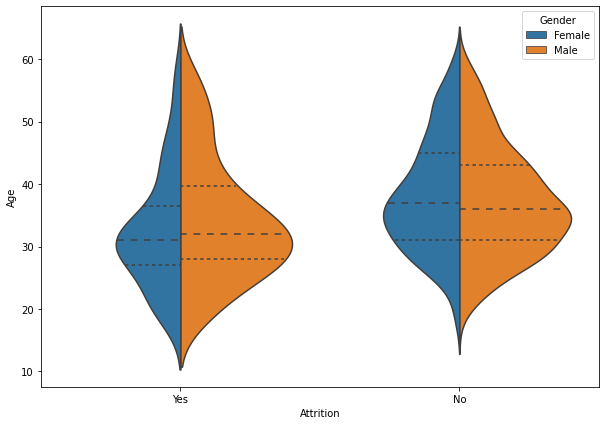

In [71]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="Age", hue="Gender", data=df, 
               split=True, scale="count", inner="quartile")
plt.show()

In the above violin plot we see that the Attrition counts both in male and female are high when the are in their mid 20's and 30's of age.

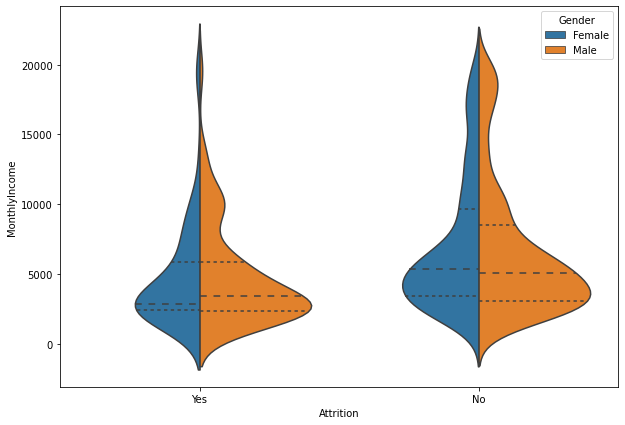

In [72]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="MonthlyIncome", hue="Gender", data=df, 
                split=True, scale="count", inner="quartile")
plt.show()

In the above plot we can see that the Attrition peaks for both male and female employees when the monthly income is less than 5000.

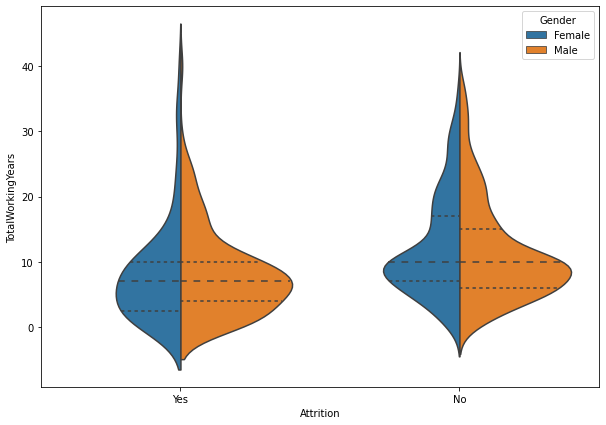

In [73]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="TotalWorkingYears", hue="Gender", data=df, 
                split=True, scale="count", inner="quartile")
plt.show()

In the above violin plot we notice that the Attrition for both male ad female employees occur when they are in their experience range of 1-10 years.

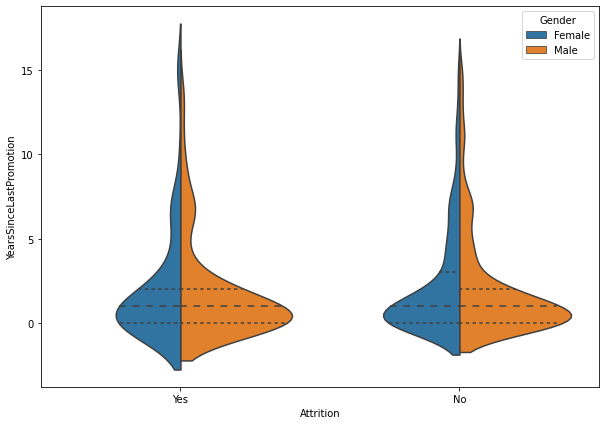

In [74]:
plt.figure(figsize=(10,7))
sns.violinplot(x="Attrition", y="YearsSinceLastPromotion", hue="Gender", data=df, 
                split=True, scale="count", inner="quartile")
plt.show()

In the above plot we see that the Attrition for both make and female employees happen when they do not see prootions happening after years of gaining experience.

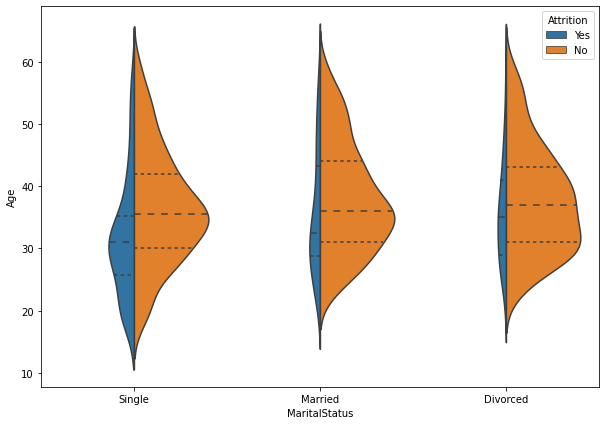

In [75]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="Age", hue="Attrition", data=df, 
              split=True, scale="count", inner="quartile")
plt.show()

In the above violin plot we can see that the Attrition rate is quite less in employees when they are married or divorced as compared to when they are single and have lesser responsibilities to deal with at their age.

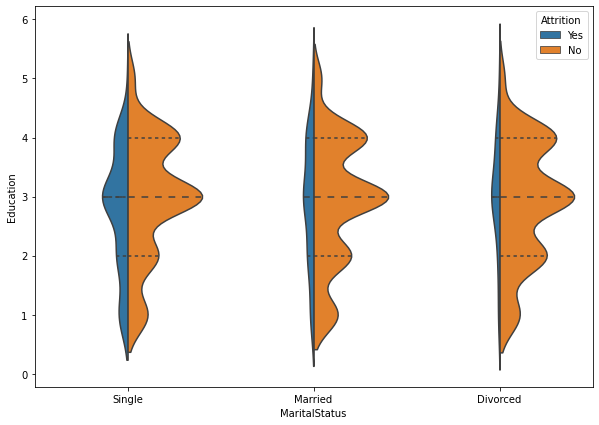

In [76]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="Education", hue="Attrition", data=df, 
                split=True, scale="count", inner="quartile")
plt.show()

In the above plot we notice that once again employees who are married or divorced and with good education choose stability in life rather than the one's who are single and are okay to take risks and oppotunities in life.

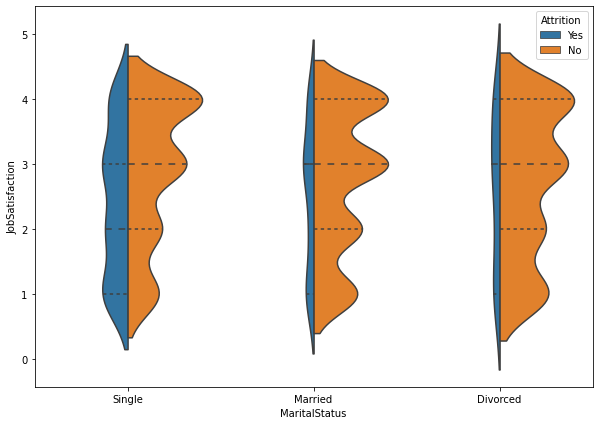

In [77]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="JobSatisfaction", hue="Attrition", data=df, 
               split=True, scale="count", inner="quartile")
plt.show()

In the above voilin part we can see that the job satisfaction part for singles is not that great compared to employees who are married or divorced may be due to the year of experience difference that makes a huge gap in pay scale. But we do otice stability and lesser attrition rate amongst employees who are married or divorced.

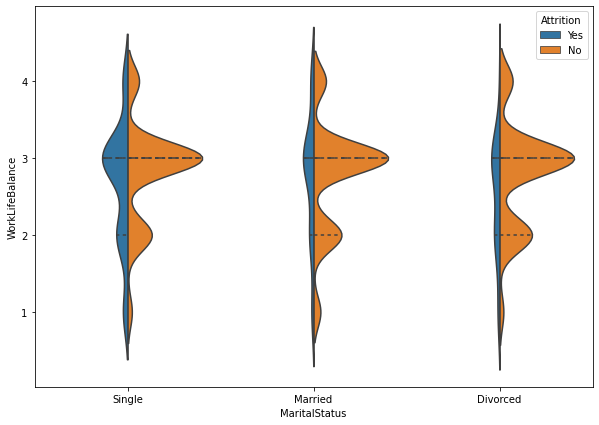

In [78]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="WorkLifeBalance", hue="Attrition", data=df, 
               split=True, scale="count", inner="quartile")
plt.show()

In the above plot we can see that Work Life balance maintained by singles are quite less therefore there are attritions observed as they have to achieved lots of skills to get better in their career.

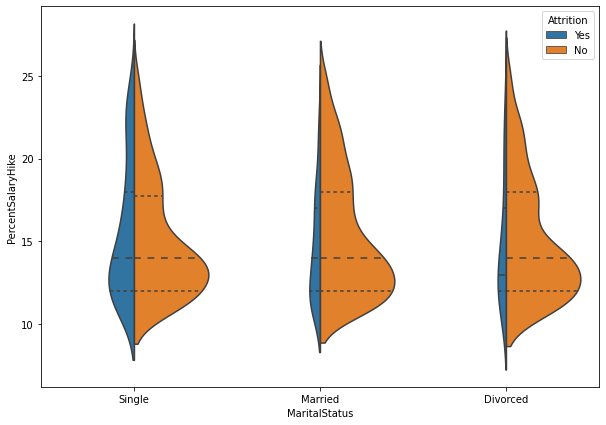

In [79]:
plt.figure(figsize=(10,7))
sns.violinplot(x="MaritalStatus", y="PercentSalaryHike", hue="Attrition", data=df, 
               split=True, scale="count", inner="quartile")
plt.show()

In the above violin plot we can see that the Percent Salary Hike plays a major role when it come to Attrition amongst the Singles as comapred to their married or divorced counterparts.

# Encoding the categorical object datatype columns

In [80]:
# Label Encoder

le = LabelEncoder()
le.fit(df["Attrition"])
le.classes_
pd.Series(le.transform(df["Attrition"])).head()

0    1
1    0
2    1
3    0
4    0
dtype: int32

 Label Encoder is used as we want our labels to be converted from the object datatype to numerical datatype.

In [81]:
df["Attrition"] = le.fit_transform(df["Attrition"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [82]:
# Ordinal Encoder

oe = OrdinalEncoder()
df['BusinessTravel'] = oe.fit_transform(df['BusinessTravel'].values.reshape(-1,1))
df['Department'] = oe.fit_transform(df['Department'].values.reshape(-1,1))
df['EducationField'] = oe.fit_transform(df['EducationField'].values.reshape(-1,1))
df['Gender'] = oe.fit_transform(df['Gender'].values.reshape(-1,1))
df['JobRole'] = oe.fit_transform(df['JobRole'].values.reshape(-1,1))
df['MaritalStatus'] = oe.fit_transform(df['MaritalStatus'].values.reshape(-1,1))
df['OverTime'] = oe.fit_transform(df['OverTime'].values.reshape(-1,1))

Ordinal Encoder is used to convert all the categorical feature columns from object datatype to integer datatype.

In [83]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2


# Visualization of data using Histogram

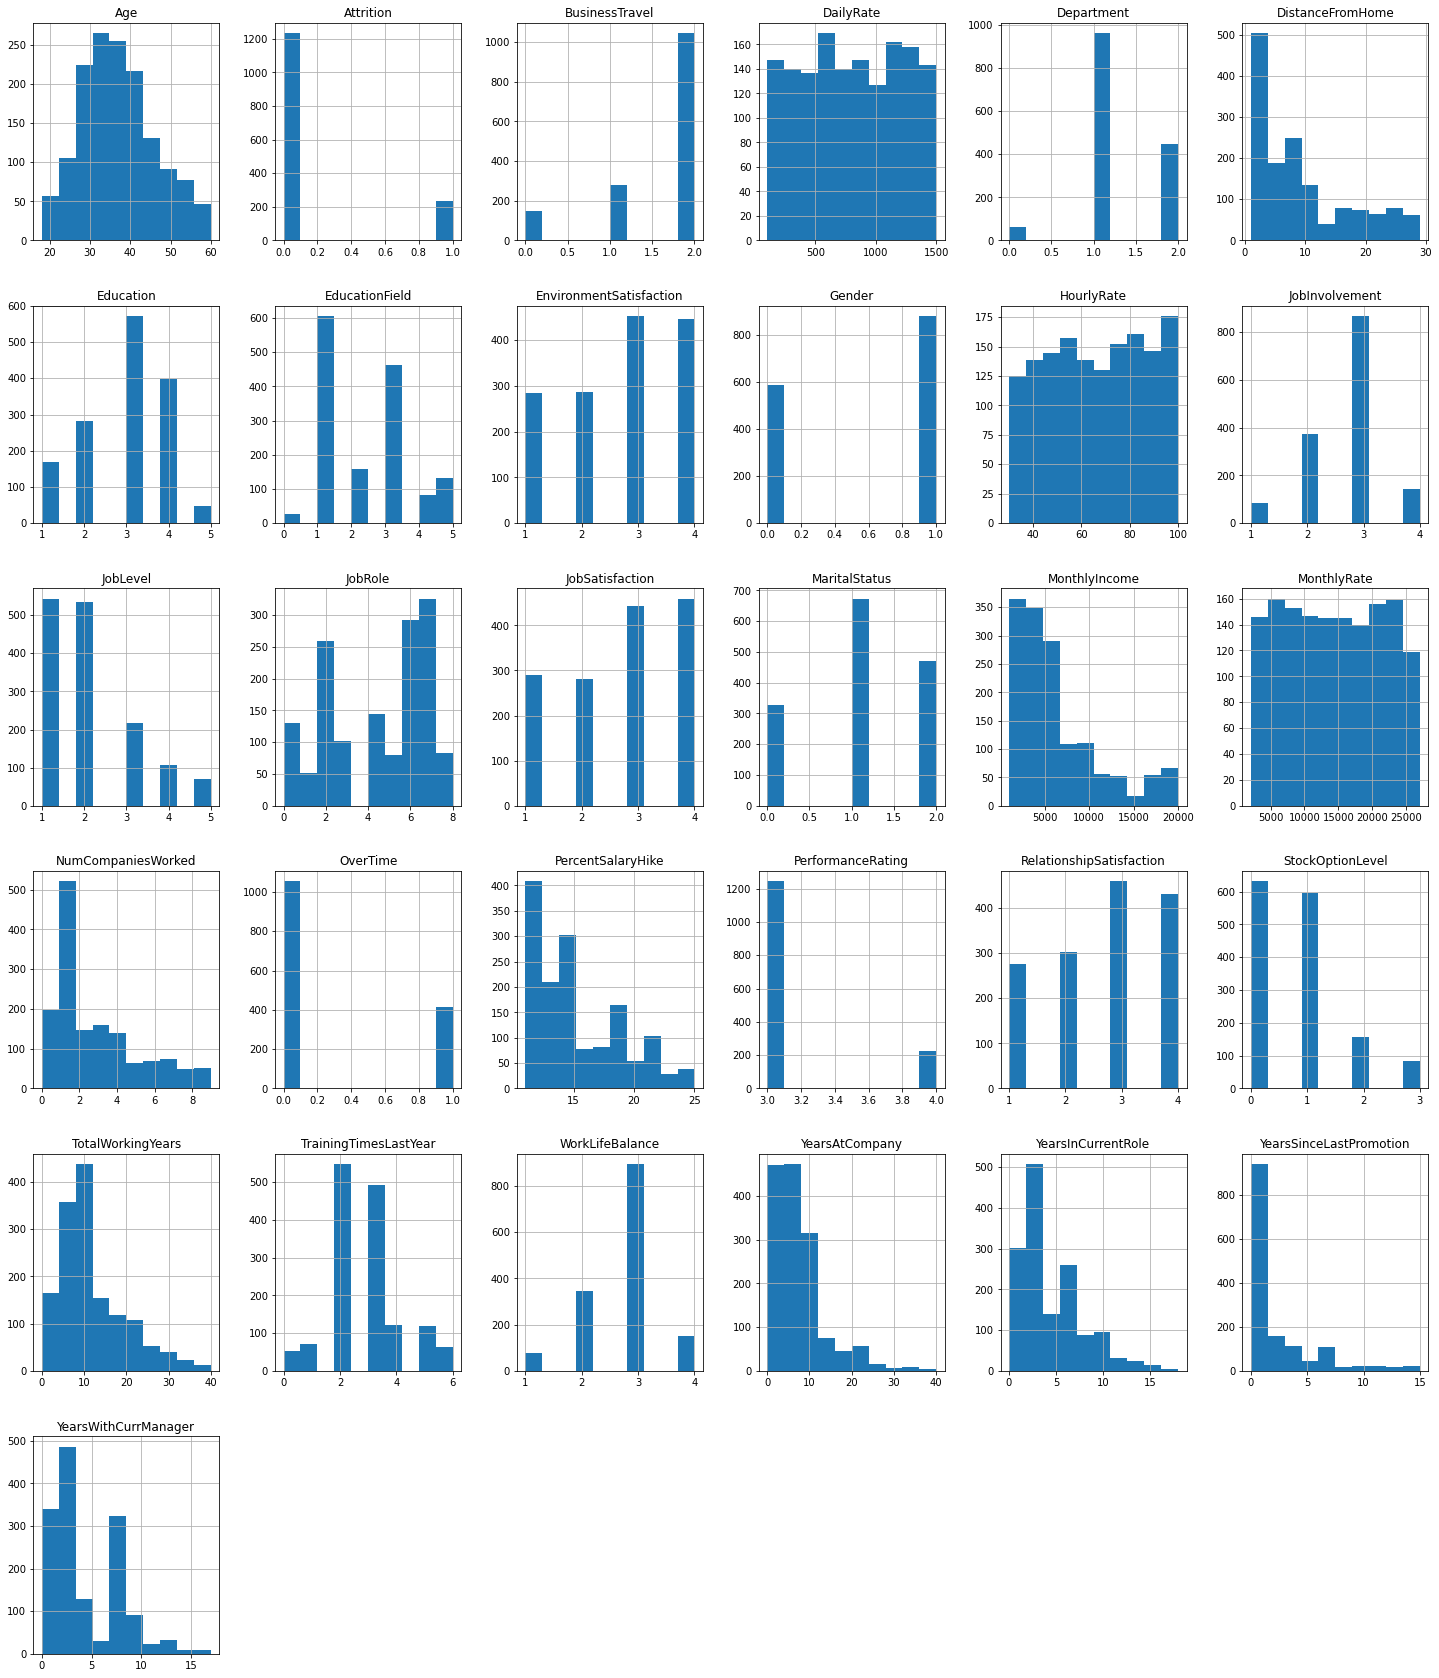

In [84]:
df.hist(figsize=(25,30))
plt.show()

As per above histogram plot we can clearly see that there are no object datatypes now, all data is in integer format.

# Correlation using a Heatmap

In [85]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,-0.000478,0.017960,-0.039403,-0.039723,0.033252,-0.047183,-0.031858,-0.041482,-0.039147,-0.041924,0.002733,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


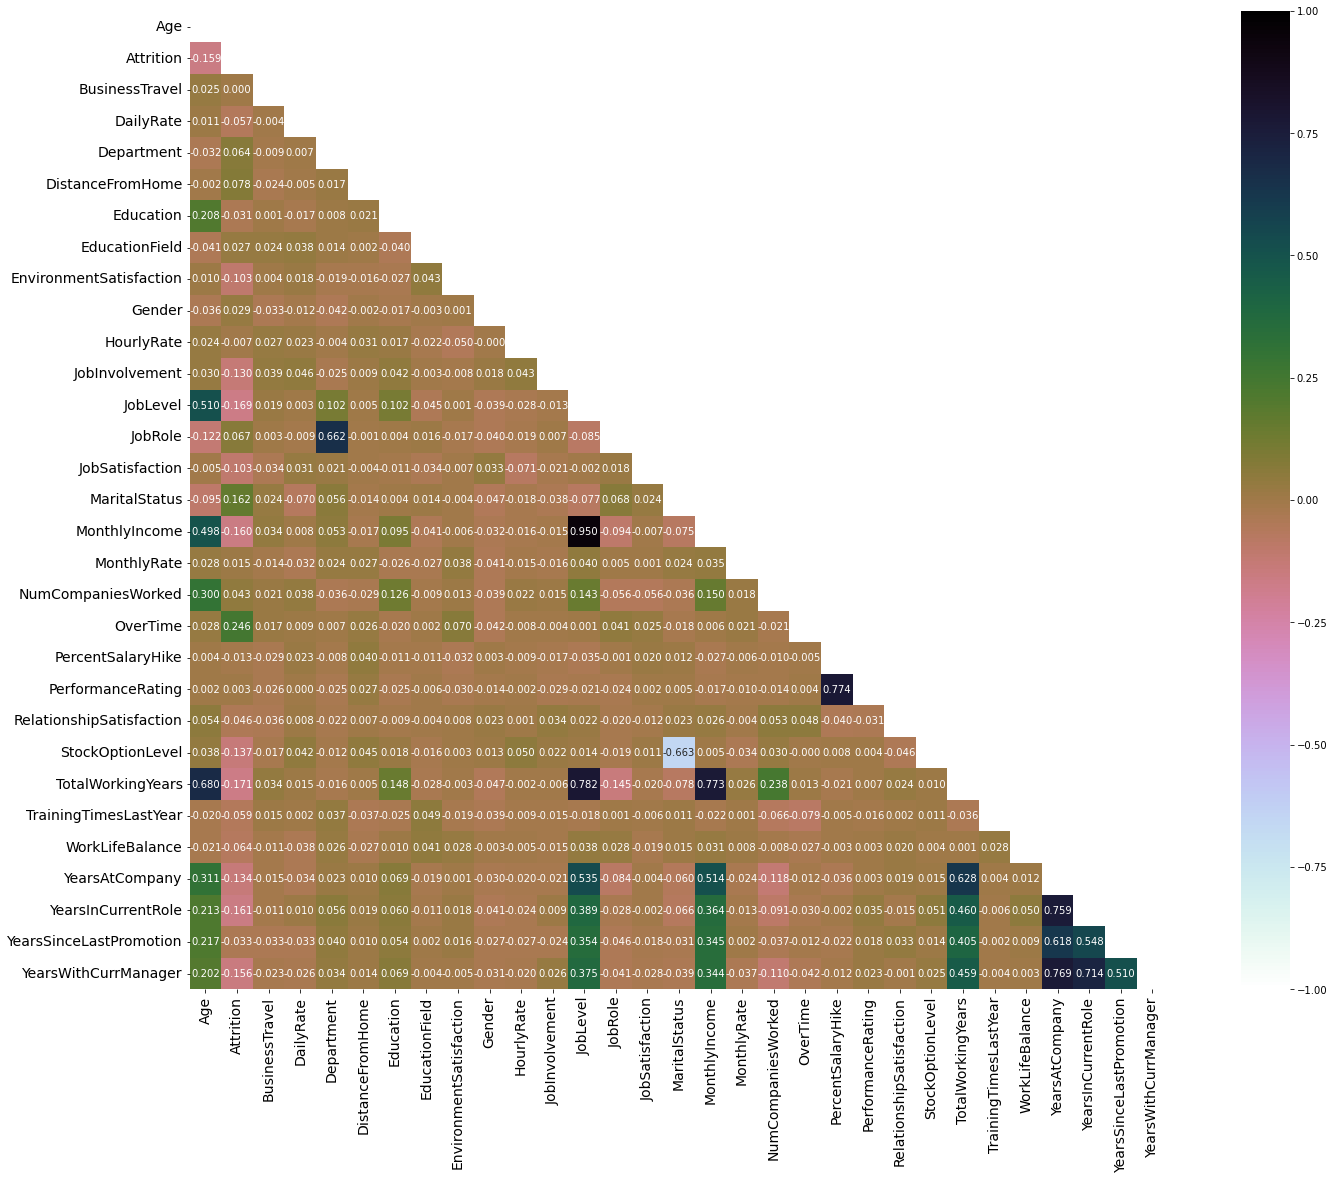

In [86]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(26,18))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cubehelix_r", mask=upper_triangle)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

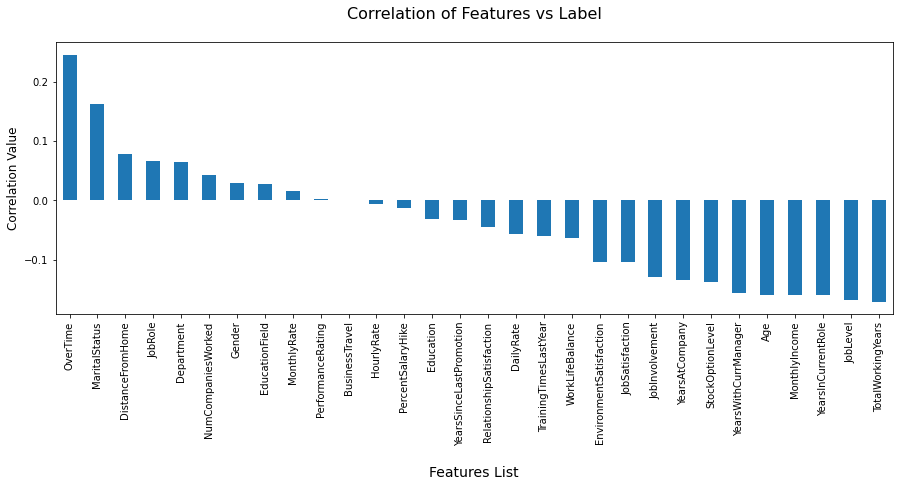

In [87]:
# Correlation of features vs label using barplot
df_corr = df.corr()
plt.figure(figsize=(15,5))
df_corr['Attrition'].sort_values(ascending=False).drop('Attrition').plot.bar()
plt.title("Correlation of Features vs Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

# Outlier removal using Z-score

In [89]:
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss after outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (1387, 31)
Shape of the dataframe after removing outliers:  (1304, 31)
Percentage of data loss after outlier removal:  5.984138428262437


We can see that before removing outliers we had 1387 rows and 31 columns.

Now after removing outliers we have 1304 rows and 31 columns.

##### % Data loss = 5.98%

# Visualization of data using boxplot after removal of outliers

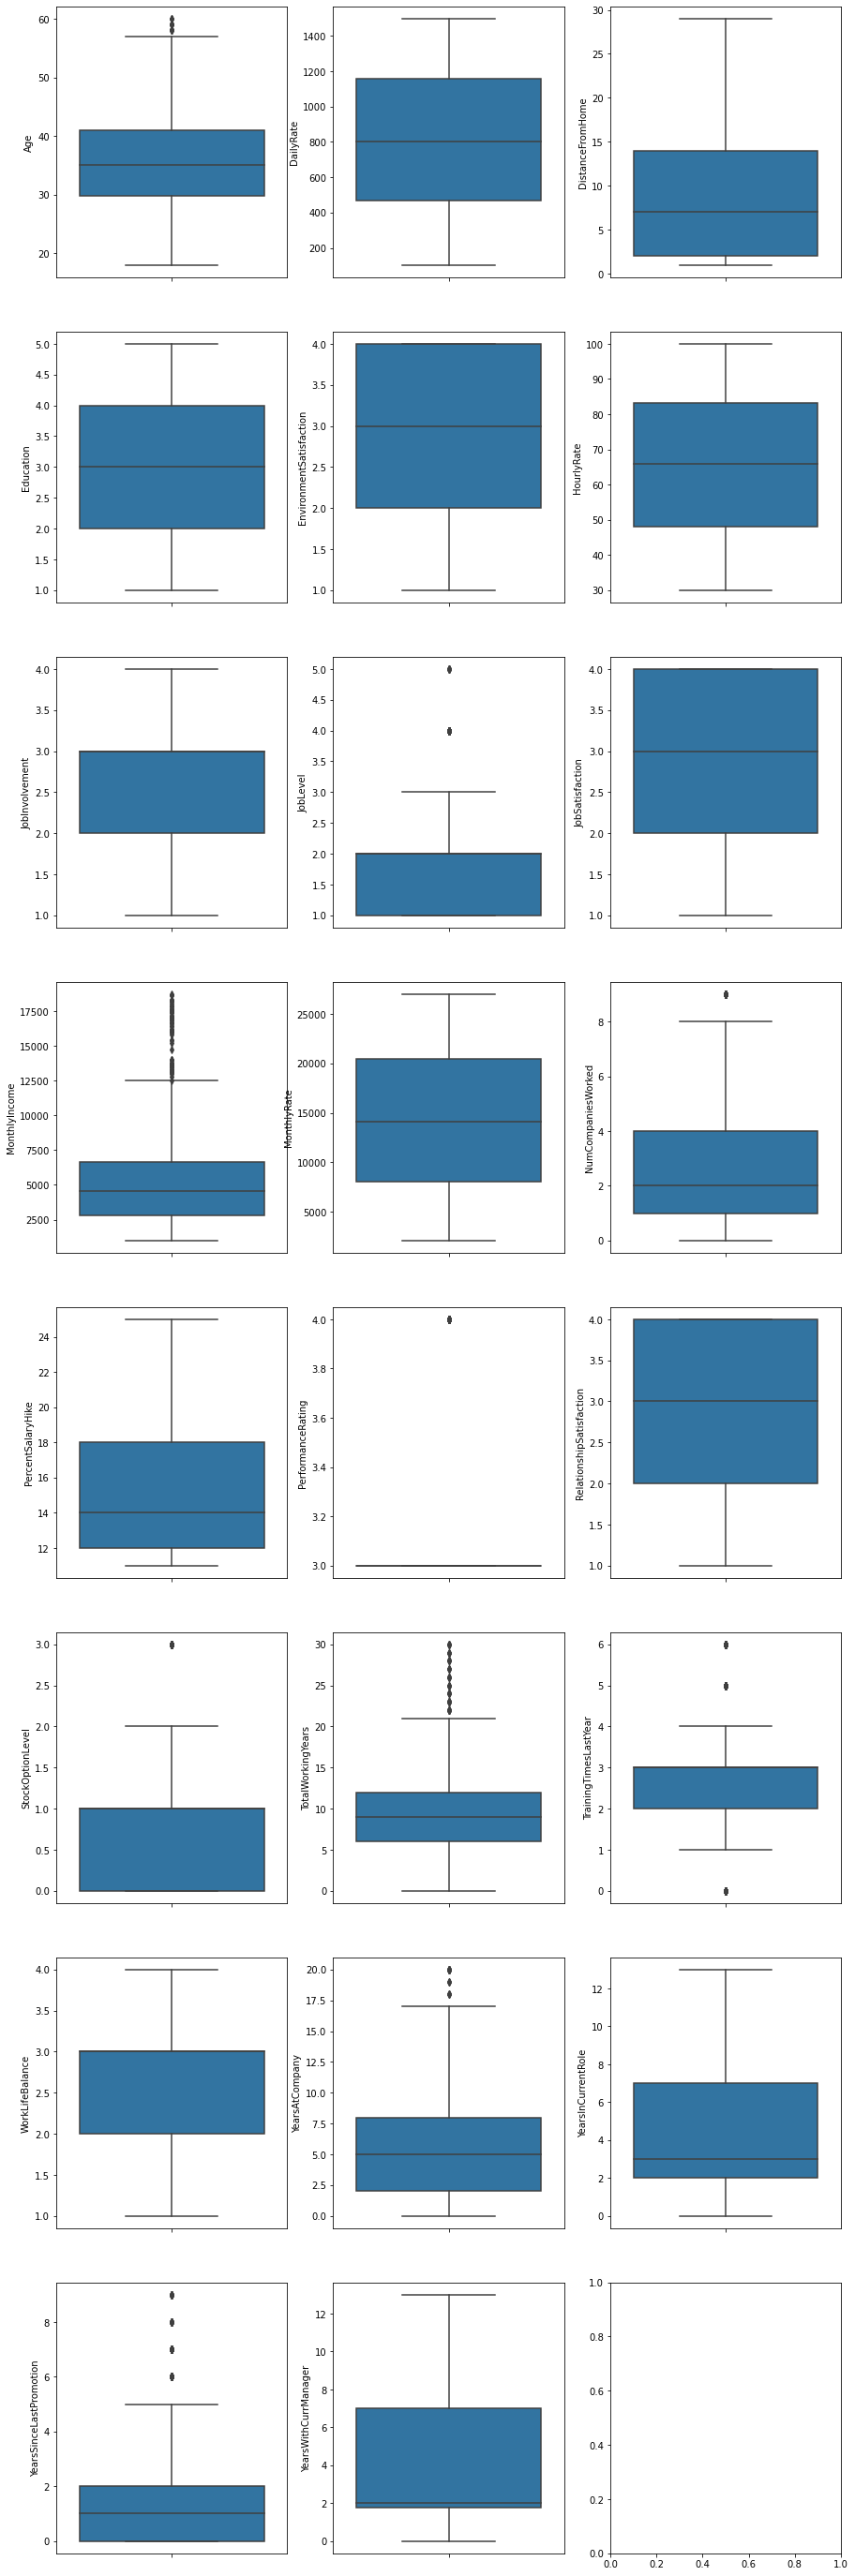

In [90]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.show()

We have removed outliers using z-score but still we can see some of the outliers present in the dataset.

In [91]:
# Lets check skewness
df.skew()

Age                         0.526943
Attrition                   1.749533
BusinessTravel             -1.414592
DailyRate                  -0.014199
Department                  0.177341
DistanceFromHome            0.935391
Education                  -0.279545
EducationField              0.551717
EnvironmentSatisfaction    -0.319471
Gender                     -0.427052
HourlyRate                 -0.032833
JobInvolvement             -0.496090
JobLevel                    0.940555
JobRole                    -0.415162
JobSatisfaction            -0.335845
MaritalStatus              -0.173388
MonthlyIncome               1.531140
MonthlyRate                 0.039330
NumCompaniesWorked          1.046568
OverTime                    0.960516
PercentSalaryHike           0.796258
PerformanceRating           1.942566
RelationshipSatisfaction   -0.275672
StockOptionLevel            0.957507
TotalWorkingYears           0.980416
TrainingTimesLastYear       0.584609
WorkLifeBalance            -0.545492
Y

# Using Log Transform to fix skewness

In [92]:
for col in integer_datatype:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

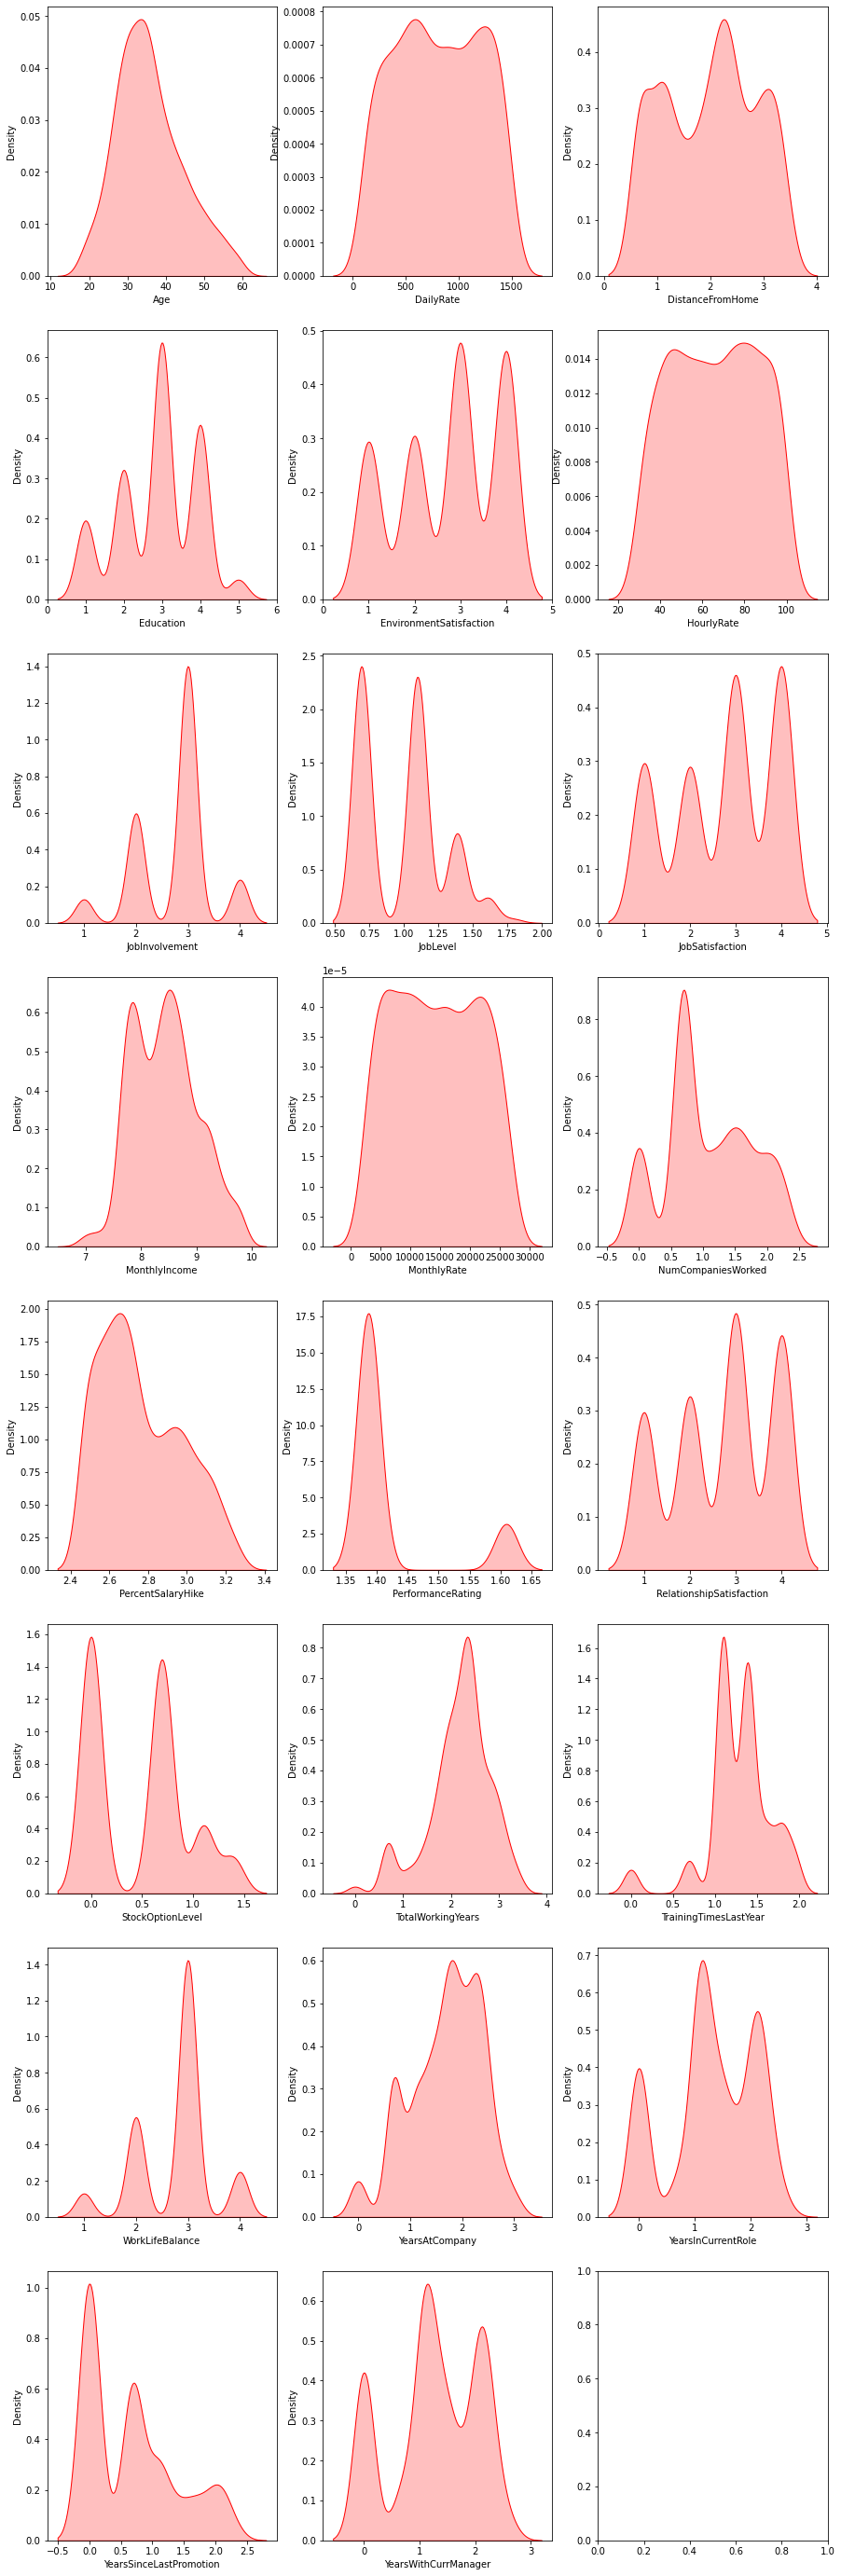

In [93]:
fig, ax = plt.subplots(ncols=3, nrows=8, figsize=(15,50))
index = 0
ax = ax.flatten()
for col, value in df[integer_datatype].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.show()

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [94]:
X = df.drop('Attrition', axis=1)
Y = df['Attrition']

# Resolving the class imbalance issue in label column

In [95]:
Y.value_counts()

0    1081
1     223
Name: Attrition, dtype: int64

In [96]:
# adding samples to make all the categorical quality values same

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [97]:
Y.value_counts()

1    1081
0    1081
Name: Attrition, dtype: int64

# Feature Scaling

In [98]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.789772,0.684189,0.855119,1.404307,-1.711608,-0.718573,-1.015106,-0.428802,-1.351245,1.516447,0.647030,0.551192,0.971923,1.430695,1.132945,0.654312,0.717681,1.762722,1.368737,-1.378461,-0.457357,-1.400443,-0.955827,0.233840,-3.531309,-2.139561,0.570114,0.605233,-0.980096,0.876758
1,1.744609,-0.992358,-1.273078,-0.572979,0.175897,-1.741996,-1.015106,0.496417,0.856326,-0.229747,-0.704544,0.551192,0.548114,-0.441679,-0.309840,0.374061,1.482741,-0.638613,-0.855903,2.133945,2.597785,1.452344,0.645727,0.543651,0.360342,0.549036,1.259403,1.250188,0.063284,1.259501
2,0.312354,0.684189,1.555898,-0.572979,-1.202780,-0.718573,1.347040,1.421636,0.856326,1.410617,-0.704544,-0.958458,-1.147124,0.494508,1.132945,-1.244185,-1.690118,1.361486,1.368737,0.079319,-0.457357,-0.449514,-0.955827,0.051997,0.360342,0.549036,-2.397453,-1.603291,-0.980096,-1.507064
3,-0.165065,-0.992358,1.605030,-0.572979,-0.841760,1.328272,-1.015106,1.421636,-1.351245,-0.494322,0.647030,-0.958458,0.548114,0.494508,-0.309840,-0.648360,1.236366,-0.638613,1.368737,-1.378461,-0.457357,0.501415,-0.955827,0.233840,0.360342,0.549036,0.953375,1.250188,1.106664,-1.507064
4,-0.881193,0.684189,-0.466277,-0.572979,-1.202780,-1.741996,0.559658,-1.354020,0.856326,-1.340961,0.647030,-0.958458,-1.147124,-0.441679,-0.309840,-0.331594,0.316404,1.930936,-0.855903,-0.972858,-0.457357,1.452344,0.645727,-0.154159,0.360342,0.549036,-0.722039,-0.095739,0.673622,-0.045430


# Finding best random state for building Regression Models

In [99]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 88.72458410351202 on Random State 716


### Our Random State is value is 716 and best accuracy score is 88.72

# Creating the training and testing data sets

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=716)

##### 25% of data is used for testing purpose & 75% data is used for training the model

# Machine Learning Model for Classification with Evaluation Metrics

In [101]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=759)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [102]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Accuracy Score: 82.80961182994456

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84       275
           1       0.84      0.80      0.82       266

    accuracy                           0.83       541
   macro avg       0.83      0.83      0.83       541
weighted avg       0.83      0.83      0.83       541

Cross Validation Score: 84.36863826875374

Accuracy Score - Cross Validation Score is -1.559026438809184


In [103]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Accuracy Score: 90.9426987060998

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91       275
           1       0.94      0.87      0.90       266

    accuracy                           0.91       541
   macro avg       0.91      0.91      0.91       541
weighted avg       0.91      0.91      0.91       541

Cross Validation Score: 91.07796595671886

Accuracy Score - Cross Validation Score is -0.13526725061905154


In [104]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Accuracy Score: 80.59149722735674

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       275
           1       0.80      0.80      0.80       266

    accuracy                           0.81       541
   macro avg       0.81      0.81      0.81       541
weighted avg       0.81      0.81      0.81       541

Cross Validation Score: 84.51191087161064

Accuracy Score - Cross Validation Score is -3.920413644253898


In [105]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Accuracy Score: 91.31238447319778

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       275
           1       0.98      0.84      0.91       266

    accuracy                           0.91       541
   macro avg       0.92      0.91      0.91       541
weighted avg       0.92      0.91      0.91       541

Cross Validation Score: 90.48146009751092

Accuracy Score - Cross Validation Score is 0.8309243756868625


In [106]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Accuracy Score: 75.6007393715342

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.58      0.71       275
           1       0.68      0.94      0.79       266

    accuracy                           0.76       541
   macro avg       0.80      0.76      0.75       541
weighted avg       0.80      0.76      0.75       541

Cross Validation Score: 79.13993670344709

Accuracy Score - Cross Validation Score is -3.539197331912888


In [107]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Accuracy Score: 94.26987060998152

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       275
           1       0.98      0.90      0.94       266

    accuracy                           0.94       541
   macro avg       0.95      0.94      0.94       541
weighted avg       0.95      0.94      0.94       541

Cross Validation Score: 93.89904627491232

Accuracy Score - Cross Validation Score is 0.37082433506920154


In [108]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Accuracy Score: 91.86691312384472

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       275
           1       0.96      0.87      0.91       266

    accuracy                           0.92       541
   macro avg       0.92      0.92      0.92       541
weighted avg       0.92      0.92      0.92       541

Cross Validation Score: 88.12419810110342

Accuracy Score - Cross Validation Score is 3.742715022741308


In [109]:
# LGBM Classifier

model=lgb.LGBMClassifier()
classify(model, X, Y)

Accuracy Score: 90.38817005545286

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       275
           1       0.94      0.86      0.90       266

    accuracy                           0.90       541
   macro avg       0.91      0.90      0.90       541
weighted avg       0.91      0.90      0.90       541

Cross Validation Score: 88.72615687280813

Accuracy Score - Cross Validation Score is 1.6620131826447277


# Hyper parameter tuning on the best Classification Machine Learning Model

In [110]:
# Choosing Decision Tree Classifier

fmod_param = {'criterion' : ["gini", "entropy"],
              'splitter' : ["best", "random"],
              'min_samples_split' : [2, 3, 4],
              'max_depth' : [4, 6, 8],
              'random_state' : [42, 111, 759]
             }

### Best classification Model is Decision Tree Classifier

In [111]:
GSCV = GridSearchCV(DecisionTreeClassifier(), fmod_param, cv=5)

In [112]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8], 'min_samples_split': [2, 3, 4],
                         'random_state': [42, 111, 759],
                         'splitter': ['best', 'random']})

In [113]:
GSCV.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_split': 2,
 'random_state': 42,
 'splitter': 'best'}

In [114]:
GSCV.best_score_

0.840218423551757

In [115]:
Final_Model = DecisionTreeClassifier(criterion="entropy", max_depth=8, min_samples_split=4, 
                                     random_state=42, splitter="best")
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 86.13678373382625


### Successfully incorporated the Hyper Parameter Tuning on the Final Model and received the accuracy score for it.

# AUC ROC Curve

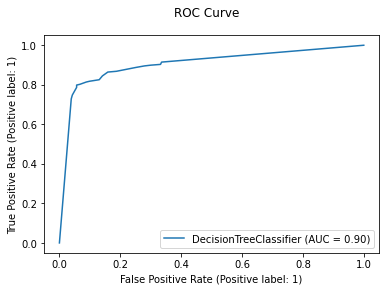

In [116]:
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

AUC-ROC curve shows score nearly about 90%-95%

# Confusion Matrix

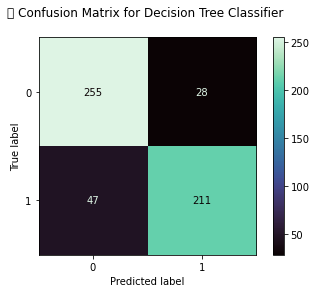

In [117]:
class_names = df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Decision Tree Classifier \n')
plt.show()

# Saving the model

In [118]:
filename = "FinalModel_hr.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_hr.pkl']

Final model is saved using joblib